In [2]:
from sklearn.datasets import fetch_olivetti_faces
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
import numpy as np

f = fetch_olivetti_faces(shuffle = False)
face_images = f.images
face_rows = f.data

In [4]:
for i in range(10):
    plt.imshow(face_images[i], cmap = plt.cm.gray)
    plt.show()

In [5]:
people_list = np.loadtxt('people.txt').astype(int)
ok_dirs = []

for i in range(1,1001):
    if not i in people_list:
#         ok_dirs.append(r'Flickr Images\im' + str(i) + '.jpg') # Windows
        ok_dirs.append(r'Flickr Images/im' + str(i) + '.jpg') # Mac
        

In [6]:
from skimage import color, io

img_list = [color.rgb2gray(io.imread(ok_dirs[i])) for i in range(len(ok_dirs))][:500]
shape_list = [io.imread(ok_dirs[i]).shape for i in range(len(ok_dirs))]

# plt.imshow(img_list[10],cmap = plt.cm.gray)
# plt.show()
# len(img_list)

In [18]:
np.random.seed(0)

dim_param = 64

gen_image_list = []

rand_subs = []

for shape in shape_list:
    xs = np.random.randint(0, shape[0]-dim_param, size = 5)
    ys = np.random.randint(0, shape[1]-dim_param, size = 5)
    rand_subs.append(zip(xs, ys))

for i in range(len(img_list)):
    for dim in rand_subs[i][:4]:
        gen_image_list.append(img_list[i][dim[0]:dim[0]+dim_param, dim[1]:dim[1]+dim_param])
            

In [6]:
X_train = list(face_images)[:300] * 5
X_train.extend(gen_image_list[:1500])
Y_train = [1 for _ in range(1500)]
Y_train.extend([0 for _ in range(1500)])
X_train_lr = np.array(X_train)
X_train_lr = X_train_lr.reshape(-1, X_train_lr.shape[0]).T



X_test = list(face_images)[300:] * 5
X_test.extend(gen_image_list[1500:])
Y_test = [1 for _ in range(500)]
Y_test.extend([0 for _ in range(500)])
X_test_lr = np.array(X_test)
X_test_lr = X_test_lr.reshape(-1, X_test_lr.shape[0]).T



In [7]:
from sklearn.linear_model import LogisticRegression

lr_baseline_model = LogisticRegression(C =10)
lr_baseline_model.fit(X_train_lr, Y_train)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
coef_mat = lr_baseline_model.coef_.reshape(64,64)
norm_coef_mat = (coef_mat - np.min(coef_mat))/(np.max(coef_mat) - np.min(coef_mat))

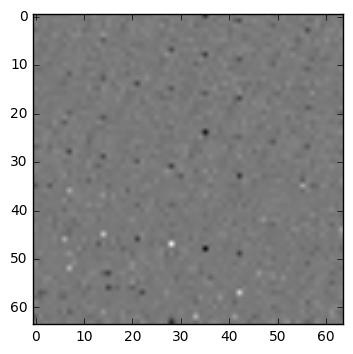

In [9]:
plt.imshow(norm_coef_mat, cmap = plt.cm.gray)
plt.show()

In [10]:
lr_baseline_model.score(X_test_lr[:100], Y_test[:100])

1.0

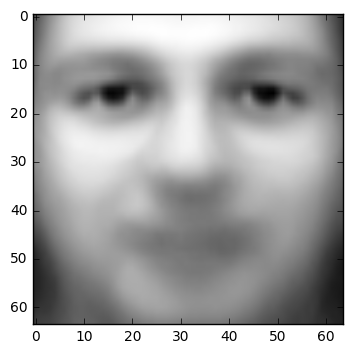

In [11]:
plt.imshow(sum(i for i in f.images)/len(f.images), cmap = plt.cm.gray)
plt.show()

In [12]:
X_train_cnn = []
X_test_cnn = []

for _ in X_train:
    X_train_cnn.append(block_reduce(_, block_size = (2,2), func = np.max).reshape(1,32,32))

for _ in X_test:
    X_test_cnn.append(block_reduce(_, block_size = (2,2), func = np.max).reshape(1,32,32))

    

In [13]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dense, Activation, Convolution2D, Flatten

model = Sequential()
model.add(Convolution2D(64, 5, 5, border_mode = 'same', input_shape = (1,32,32)))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), border_mode = 'same'))
model.add(Flatten())
model.add(Dense(output_dim = 64, activation = 'relu'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))


Using Theano backend.


In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(np.array(X_train_cnn), Y_train)

ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, None, None, None), kshp=(64, 1, 5, 5)}(convolution2d_input_1, convolution2d_1_W)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\Users\Arjun Khandelwal\Anaconda2\lib\site-packages\theano\gof\opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "C:\Users\Arjun Khandelwal\Anaconda2\lib\site-packages\theano\tensor\nnet\opt.py", line 402, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link aga

AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?

In [ ]:
import theano

In [18]:
theano.config.ldflags

AttributeError: 'TheanoConfigParser' object has no attribute 'ldflags'

In [20]:
import os
os.path.expanduser('~/.theanorc.txt')

'C:\\Users\\Arjun Khandelwal/.theanorc.txt'

In [21]:
import scipy.misc

for i in range(len(gen_image_list[1500:])):
    scipy.misc.imsave(r'testbackground\im' + str(i) +'.png', gen_image_list[1500:][i])